In [1]:
import tensorflow as tf
import tensorflow_hub as hub
from io import BytesIO
from PIL import Image as PilImage
import numpy as np
from matplotlib import pyplot as plt
from six.moves.urllib.request import urlopen

2025-12-02 10:56:15.814123: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1764669375.944540    9083 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1764669375.978716    9083 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1764669376.284963    9083 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1764669376.284977    9083 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1764669376.284979    9083 computation_placer.cc:177] computation placer alr

In [2]:
def read_image(filename):
    fd = None
    if(filename.startswith('http')):
      fd = urlopen(filename)
    else:
      fd = tf.io.gfile.GFile(filename, 'rb')

    pil_image = PilImage.open(fd)
    width, height = pil_image.size
    # crop to make the image square
    pil_image = pil_image.crop((0, 0, height, height))
    pil_image = pil_image.resize((257,257),PilImage.LANCZOS)
    image_unscaled = np.array(pil_image)
    image_np = np.expand_dims(
        image_unscaled.astype(np.float32) / 255., axis=0)
    return image_np

In [7]:
def visualize_output_comparison(img_original, img_masked, img_filled):
  plt.figure(figsize=(24,12))
  plt.subplot(131)
  plt.imshow((np.squeeze(img_original)))
  plt.title("Original", fontsize=24)
  plt.axis('off')
  plt.subplot(132)
  plt.imshow((np.squeeze(img_masked)))
  plt.title("Masked", fontsize=24)
  plt.axis('off')
  plt.subplot(133)
  plt.imshow((np.squeeze(img_filled)))
  plt.title("Generated", fontsize=24)
  plt.axis('off')
  plt.show()

In [8]:
wikimedia = "images/Nusfjord_road,_2010_09.jpg"
# wikimedia = "https://upload.wikimedia.org/wikipedia/commons/thumb/4/47/Beech_forest_M%C3%A1tra_in_winter.jpg/640px-Beech_forest_M%C3%A1tra_in_winter.jpg"
# wikimedia = "https://upload.wikimedia.org/wikipedia/commons/thumb/b/b2/Marmolada_Sunset.jpg/640px-Marmolada_Sunset.jpg"
# wikimedia = "https://upload.wikimedia.org/wikipedia/commons/thumb/9/9d/Aegina_sunset.jpg/640px-Aegina_sunset.jpg"

input_img = read_image(wikimedia)

In [9]:
model_name = 'Boundless Quarter' # @param ['Boundless Half', 'Boundless Quarter', 'Boundless Three Quarters']
model_handle_map = {
    'Boundless Half' : 'https://tfhub.dev/google/boundless/half/1',
    'Boundless Quarter' : 'https://tfhub.dev/google/boundless/quarter/1', 
    'Boundless Three Quarters' : 'https://tfhub.dev/google/boundless/three_quarter/1'
}

model_handle = model_handle_map[model_name]

In [10]:
print("Loading model {} ({})".format(model_name, model_handle))
model = hub.load(model_handle)

Loading model Boundless Quarter (https://tfhub.dev/google/boundless/quarter/1)


I0000 00:00:1764669615.254328    9083 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 8942 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 2080 Ti, pci bus id: 0000:08:00.0, compute capability: 7.5


I0000 00:00:1764669617.361107    9732 cuda_dnn.cc:529] Loaded cuDNN version 90300


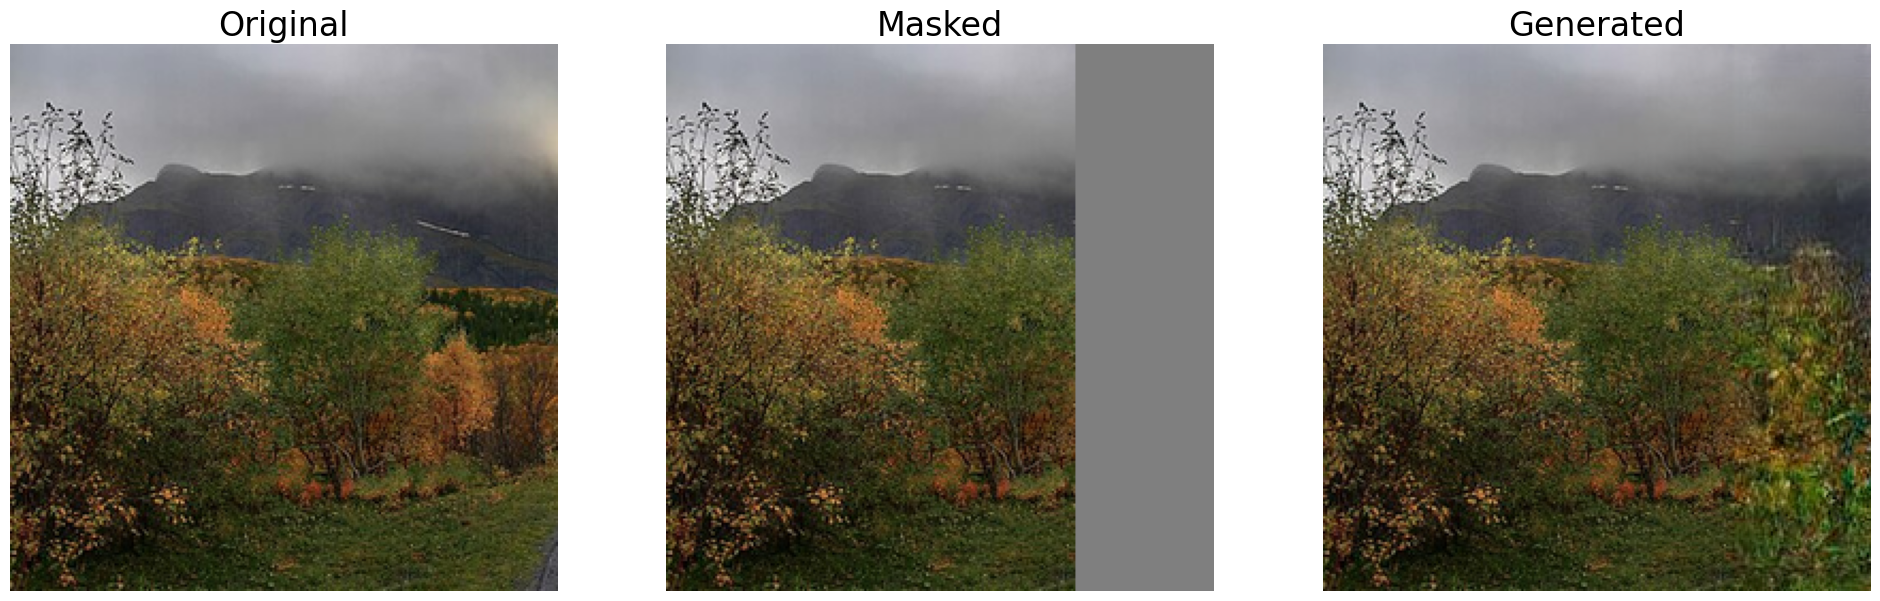

In [11]:
result = model.signatures['default'](tf.constant(input_img))
generated_image =  result['default']
masked_image = result['masked_image']

visualize_output_comparison(input_img, masked_image, generated_image)